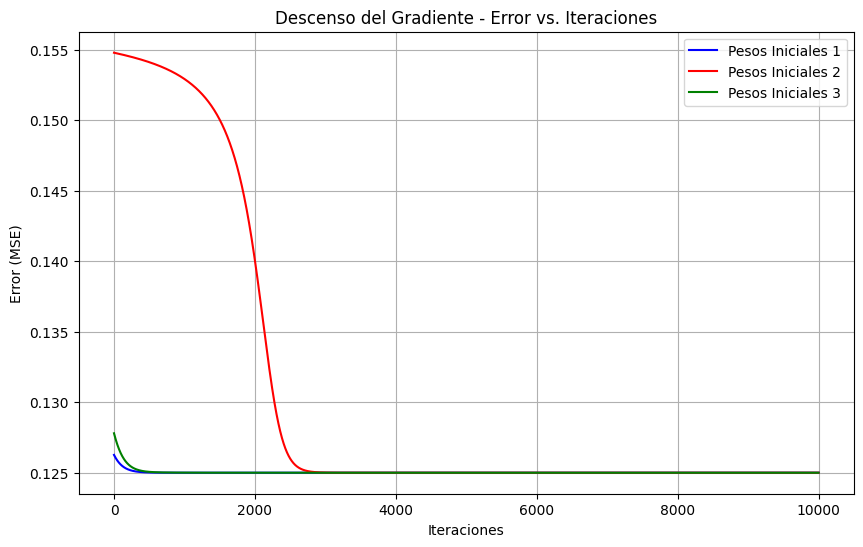

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de activación sigmoide
def sigmoid(x):
  # Función sigmoide: 1 / (1 + exp(-x))
  return 1 / (1 + np.exp(-x))

# Derivada de la función sigmoide
def sigmoid_derivative(x):
  # Derivada de la sigmoide: sigmoide(x) * (1 - sigmoide(x))
  return sigmoid(x) * (1 - sigmoid(x))

# Función de costo (error cuadrático medio)
def mse_loss(y_true, y_pred):
    # Error cuadrático medio: 1/2n * sum((y_true - y_pred)^2)
    return 0.5 * np.mean((y_true - y_pred)**2)


# Función para realizar el descenso del gradiente
def descenso_gradiente(X, y, pesos_iniciales, tasa_aprendizaje, precision, max_iteraciones):
    pesos = pesos_iniciales
    errores = []
    pesos_historial = []  # Almacenar el historial de pesos

    for i in range(max_iteraciones):
        # Calcular la salida de la red neuronal
        z = np.dot(X, pesos)
        y_pred = sigmoid(z)

        # Calcular el error
        error = mse_loss(y, y_pred)
        errores.append(error)
        pesos_historial.append(pesos.copy()) # Agregar copia de los pesos actuales al historial

        # Calcular el gradiente
        delta = (y_pred - y) * sigmoid_derivative(z)
        gradiente = np.dot(X.T, delta) / len(X)

        # Actualizar los pesos
        pesos -= tasa_aprendizaje * gradiente


        # Verificar la precisión
        if error < precision:
            print(f"Precisión alcanzada en la iteración {i+1}")
            break
    return pesos, errores, pesos_historial



# Datos de ejemplo (XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])


# Parámetros del descenso del gradiente

tasa_aprendizaje = 0.1
precision = 0.001
max_iteraciones = 10000


# Valores iniciales de los pesos (variando en cada prueba)
pesos_iniciales_1 = np.random.rand(2, 1)
pesos_iniciales_2 = np.random.rand(2, 1) * 2
pesos_iniciales_3 = np.random.rand(2,1) * 0.5


# Ejecutar el descenso del gradiente con diferentes valores iniciales de pesos
pesos_opt_1, errores_1, pesos_hist_1 = descenso_gradiente(X, y, pesos_iniciales_1, tasa_aprendizaje, precision, max_iteraciones)
pesos_opt_2, errores_2, pesos_hist_2 = descenso_gradiente(X, y, pesos_iniciales_2, tasa_aprendizaje, precision, max_iteraciones)
pesos_opt_3, errores_3, pesos_hist_3 = descenso_gradiente(X, y, pesos_iniciales_3, tasa_aprendizaje, precision, max_iteraciones)

# Graficar el error en función de las iteraciones con diferentes colores
plt.figure(figsize=(10, 6))
plt.plot(errores_1, label="Pesos Iniciales 1", color='blue') # azul
plt.plot(errores_2, label="Pesos Iniciales 2", color='red')  # rojo
plt.plot(errores_3, label="Pesos Iniciales 3", color='green')  # verde
plt.xlabel("Iteraciones")
plt.ylabel("Error (MSE)")
plt.title("Descenso del Gradiente - Error vs. Iteraciones")
plt.legend()
plt.grid(True)
plt.show()
